In [1]:
# Import autograd and its NumPy wrapper
import autograd as grad
import autograd.numpy as np

# Import other useful packages
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
# Fit function: f(t|params={A, f, phi}) = A sin(2 pi f t + phi)
def func_to_fit(t, parameters):
    amplitude, frequency, phase = parameters
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

# Create the chi_squared function for a given data set
def generate_chi_squared(t, y_data):

    # Chi_squared = Sum[(y_data - f(t|params))^2]
    def chi_squared(parameters):
        delta_y = y_data - func_to_fit(t, parameters)
        return np.sum(delta_y * delta_y)

    return chi_squared

In [3]:
# Set a fixed seed for reproducibility
np.random.seed(1234)

# Set true values for fit parameters
amplitude = 3.0
frequency = 0.5
phase = np.pi / 2
parameters = np.array([amplitude, frequency, phase])

# Initial guess = true values + white noise with variance of 1/400 times true values
initial_guess = parameters * (1 + np.random.randn(*parameters.shape) / 20)

# Create data set and add noise
t = np.linspace(-5, 15, 1000)
y = func_to_fit(t, parameters)
y += np.random.randn(*y.shape) * y / 10
y0 = func_to_fit(t, initial_guess)

# Plot the data and the initial guess
plt.figure(figsize=(14, 7))
plt.plot(t, y, '.', markersize=10)
plt.plot(t, y0, 'k-', linewidth=3)
plt.show()

In [4]:
# Generate the function to minimize, its Jacobian, and its Hessian
chi_squared = generate_chi_squared(t, y)
jac_chi_squared = grad.jacobian(chi_squared)
hess_chi_squared = grad.jacobian(grad.grad(chi_squared))

# Fit the data and print the result
result = opt.minimize(fun=chi_squared, x0=initial_guess, method='Newton-CG', jac=jac_chi_squared, hess=hess_chi_squared)
print(result)

     fun: 42.242010083976595
     jac: array([ 5.42969445e-06, -2.32388920e-04, -4.26911153e-04])
 message: 'Optimization terminated successfully.'
    nfev: 13
    nhev: 10
     nit: 10
    njev: 22
  status: 0
 success: True
       x: array([3.00680225, 0.49997051, 1.56768984])


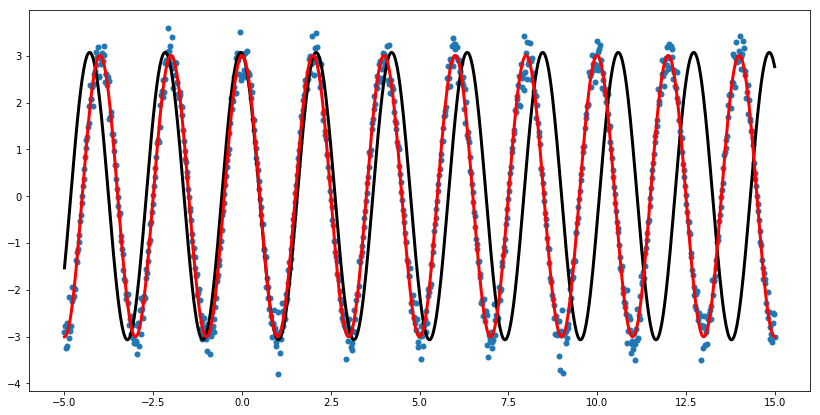

In [5]:
# Compute the fitted result
yf = func_to_fit(t, result.x)

# Plot the data, the initial guess, and the fitted function
plt.figure(figsize=(14, 7))
plt.plot(t, y, '.', markersize=10)
plt.plot(t, y0, 'k-', linewidth=3)
plt.plot(t, yf, 'r-', linewidth=3)
plt.show()